# Graded Challenge 7

# i. Introduction

___
___
Name    : Vicky Eldora Wuisan

Dataset : __[Twitter Tweets Sentiment Dataset](https://www.kaggle.com/datasets/yasserh/twitter-tweets-sentiment-dataset)__

Deployment: __[Hugging Face](https://huggingface.co/spaces/vickyeldora/Predict-Twitter-Tweets-Sentiment)__

---
---

> Problem Statement :   

In today's world, people can easily express their opinions on social media. Therefore, as a company operating in the social media sector, specifically Twitter, we want to identify and classify tweets posted by Twitter users into three categories: neutral, positive, and negative. We aim to do this because it is observed that some people misuse the platform to tweet hateful content __[source](https://news.detik.com/berita/d-2830824/duel-di-depan-istora-senayan-karena-twitwar-ini-klarifikasi-redinparis)__. Twitter is trying to tackle this problem. Hence, we will attempt to create a robust NLP-based classification model to distinguish negative tweets and block such tweets, and if necessary, block the accounts that post these negative tweets.

> Objective :   

The main objective of this project is to develop an NLP-based classification model aimed at predicting neutral, negative, and positive tweets based on the given dataset. The method used will be a Recurrent Neural Network (RNN). Model evaluation will be conducted using the accuracy metric to determine whether the model is a good fit, underfit, or overfit, which will then facilitate its application for predictive purposes.

# iii. Import Libraries

In [1]:
# load data
import zipfile
import os
import pandas as pd
import numpy as np

# data visualization
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# NLP visualization
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter

# Pre-Processing
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import nltk
import re
from string import punctuation
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

# Tensorflow
import tensorflow as tf
import tensorflow_hub as tf_hub
from tensorflow.keras.layers import TextVectorization, Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, GRU, Dropout, Reshape
from tensorflow.keras.callbacks import EarlyStopping

# Models classification evaluation
from sklearn.metrics import classification_report, confusion_matrix

# Download model
from google.colab import files

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# nltk download
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


# iii. Data Loading

In [2]:
# download dataset
!kaggle datasets download -d yasserh/twitter-tweets-sentiment-dataset

Dataset URL: https://www.kaggle.com/datasets/yasserh/twitter-tweets-sentiment-dataset
License(s): CC0-1.0
  0% 0.00/1.23M [00:00<?, ?B/s]
100% 1.23M/1.23M [00:00<00:00, 27.6MB/s]


In [3]:
with zipfile.ZipFile('twitter-tweets-sentiment-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('twitter-tweets-sentiment-dataset')
'''
This code efficiently extracts all files from `twitter-tweets-sentiment-dataset.zip` into 
a directory named `twitter-tweets-sentiment-dataset`, 
ensuring proper handling of the file through the `with` statement. 
This is a common approach when dealing with compressed files in Python.
'''

In [4]:
# List all files in the extracted directory
os.listdir('twitter-tweets-sentiment-dataset')

['Tweets.csv']

In [5]:
# Read the data
df_ori = pd.read_csv('twitter-tweets-sentiment-dataset/Tweets.csv')

# duplicate dataset
df = df_ori.copy()

# Display the top 3 rows of the data
df.head(3)

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative


## Data Information

In [6]:
# Display the description/info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


From the information above, it can be concluded that:

- This dataset contains 27,481 rows and 4 columns.
- This dataset has no null data.
- The features included are `textID`, `text`, `selected_text`, and `sentiment`.

Next, I will check the number of unique values for each feature.

In [7]:
# Display the number of unique values
df.nunique()

textID           27481
text             27480
selected_text    22463
sentiment            3
dtype: int64

Next, I will check the column names to see if there are any spaces in them.

In [8]:
# Display all column names
df.columns

Index(['textID', 'text', 'selected_text', 'sentiment'], dtype='object')

The column names are already well-formatted.

## Data Cleaning

After reviewing and understanding the data information, I will proceed with data cleaning.

In [9]:
# Check for duplicate data
df.duplicated().sum()

0

In [10]:
# Check for missing values
df.isnull().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

There is 1 missing value in the `text` column and 1 missing value in the `selected_text` column. I will drop them as they are few in number and dropping them will not significantly impact the dataset.

In [11]:
# drop missing value
df.dropna(inplace=True)

# Check kembali for missing values
df.isnull().sum()

textID           0
text             0
selected_text    0
sentiment        0
dtype: int64

Column `textID` is index and we are not going to use the `selected_text` column in our analysis so I will delete all of them.

In [12]:
# Delete unnecessary column
df = df.drop(['selected_text','textID'], axis=1)
df.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [13]:
# Display the unique values from the 'sentiment' column
df['sentiment'].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

The `sentiment` column contains 3 unique values: `neutral`, `negative`, and `positive`.

In [14]:
# Display the description after dropping columns and handling missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27480 entries, 0 to 27480
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       27480 non-null  object
 1   sentiment  27480 non-null  object
dtypes: object(2)
memory usage: 644.1+ KB


After data cleaning, the dataset is now ready for exploration.

# iv. Exploratory Data Analysis (EDA)

Before preprocessing, I will perform exploratory data analysis (EDA). I will copy the dataset to `df_eda` to ensure that any changes made during the exploration process do not affect the original data.

In [15]:
# create copy of dataframe
df_eda = df.copy()

## 1. Target Ratio

want to see if our target balance or not

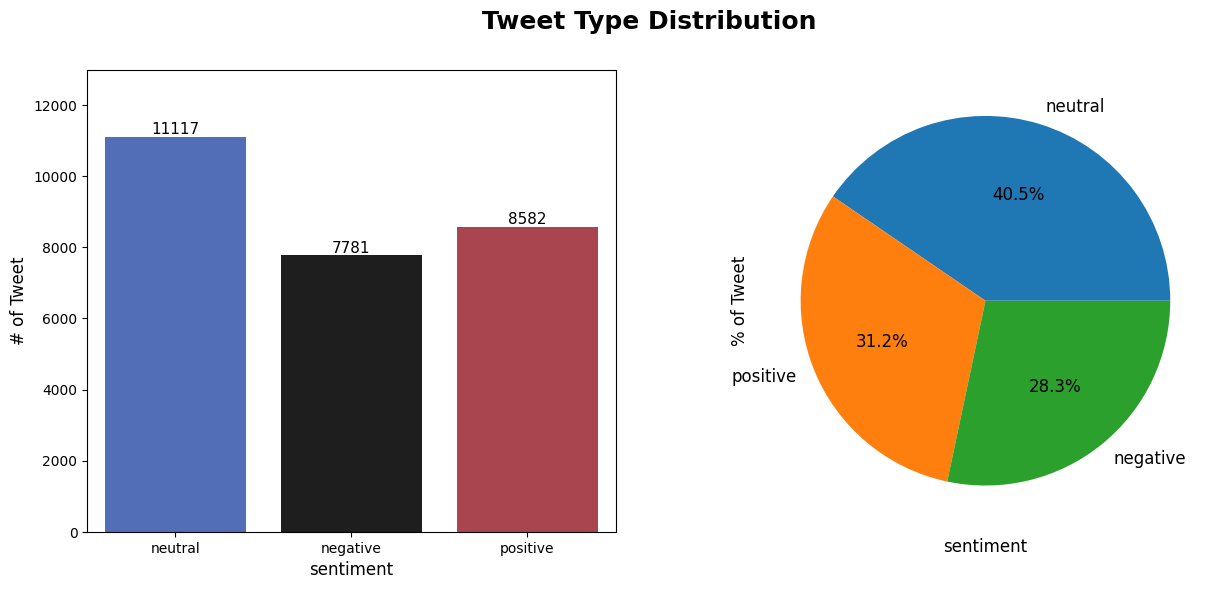

In [16]:
# Membuat visualisasi Distribusi Tweet
fig, ax =plt.subplots(1,2,figsize=(15,6))

sns.countplot(x='sentiment', data=df_eda, palette="icefire", ax=ax[0])
ax[0].set_xlabel("sentiment", fontsize= 12)
ax[0].set_ylabel("# of Tweet", fontsize= 12)
fig.suptitle('Tweet Type Distribution', fontsize=18, fontweight='bold')
ax[0].set_ylim(0,13000)
ax[0].tick_params(axis='x', rotation=0)
plt.xlabel("sentiment", fontsize= 12)
plt.ylabel("# of Tweet", fontsize= 12)

for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+205), ha='center', va='center',fontsize = 11)

df_eda['sentiment'].value_counts().plot(kind='pie',autopct='%1.1f%%', textprops = {"fontsize":12})
ax[1].set_ylabel("% of Tweet", fontsize= 12)
plt.show()

The data appears to be balanced. There are 11,117 neutral tweets, accounting for 40.5% of the dataset, followed by 8,582 positive tweets, accounting for 31.2%, and 7,781 negative tweets, accounting for 28.3%.

## 2. Text tweet sample

let's print out some tweets to observe the sentence patterns.

In [17]:
# Print sample tweet
pd.set_option('display.width', None)
sample_neutral = df_eda[df_eda['sentiment']=='neutral'].sample(n=15)
sample_positive = df_eda[df_eda['sentiment']=='positive'].sample(n=15)
sample_negative = df_eda[df_eda['sentiment']=='negative'].sample(n=15)

# Print sample_neutral
print('sample_neutral')
print('-'*100)
for i in range(0,15):
    print(sample_neutral.iloc[i,0])
print('-'*100)
print('')

# Print sample_positive
print('sample_positive')
print('-'*100)
for i in range(0,15):
    print(sample_positive.iloc[i,0])
print('-'*100)
print('')

# Print sample_negative
print('sample_negative')
print('-'*100)
for i in range(0,15):
    print(sample_negative.iloc[i,0])
print('-'*100)

sample_neutral
----------------------------------------------------------------------------------------------------
 lol   the things u gotta do sometimes man smh lol
 thanx
_carter  we can`t see the video it`s private
_bbcrew dude im sleepy and went to bed as soon as i got home.  whhaacck.
well.. i just saw the dead zone for the first time. its a good TV show.  is back
 don`t 4get Gina Thomas! ( the things u do, keep artist running from U) she`s a corrections officer in Jersey now
 oh yeah - love his choregoraphy. the pants...not so much.
studying for my exam tomorrow @ 2 & packin up!
TGIF!! But I have so much work to do this weekend
IDIOTat)MilanQ Heyy. Th*nks For The Follow.  Have A Good Night. (Frank_Whyte) #IDIOT
 No problem. Unfortunately, I think it was just something I had to sort out on my own.
i am ****...**** you lucas at your czech republic beer that tastes like heaven in a bottle!! Your amazing
has made up her mind.....
 Quaver Sandwiches  and tea.
 I wanna go but my car n

Based on the information above, it can be concluded that:

1. There are several special characters such as @, #, etc.
   - Examples:
     - "@_Cantus_ all i hear is coffee brewing at my end"
     - "#TCOT"

2. Emoticons like :P are present. Emoticons can convey the emotion of the tweet author, but they cannot be processed directly in NLP. Therefore, they will need to be handled separately.
   - Examples:
     - ":P"
     - "aw :)"

3. Whitespace and punctuation marks such as periods, commas are present in some tweet types.
   - Examples:
     - "Geez, a cool man like him be the villains. Too bad"
     - "Phone disconnects my internet. Right in the middle of an uber."

4. Hyperlinks are present in some tweet types.
   - Examples:
     - "online! www.dujourmag.com/subscribe"
     - "says HAPPY MOTHER`S DAY! http://plurk.com/p/sv70e"

5. Some tweets extensively use capitalized letters.
   - Examples:
     - "HAPPY MOTHERS DAY MOMMY!!!!"

Therefore, in the process of classifying tweets, aspects such as special characters, emoticons, whitespace, punctuation, and hyperlinks need to be considered. Additionally, capitalized letters also need to be addressed in preprocessing to ensure classification accuracy.

## 3. Number of Sentences and Words

At this point, I'd like to know:

- The maximum number of sentences and words for each category.
- The average number of sentences and words for each category.

- The maximum number of sentences and words for each neutral, positive, and negative tweet.
- The average number of sentences and words for each neutral, positive, and negative tweet.

In [18]:
# Menghitung jumlah kalimat pada setiap tweet
df_eda['sentences_count'] = df_eda['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

# Menghitung jumlah kata pada setiap tweet
df_eda['word_count'] = df_eda['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [19]:
# Print Max and Average sentences_count
print('Max kalimat pada setiap tweet adalah ', df_eda['sentences_count'].max())
print('Mean kalimat pada setiap tweet adalah ', df_eda['sentences_count'].mean())

# Print Max and Average word_count
print('Max kata pada setiap tweet adalah ', df_eda['word_count'].max())
print('Mean kata pada setiap tweet adalah ', df_eda['word_count'].mean())

Max kalimat pada setiap tweet adalah  34
Mean kalimat pada setiap tweet adalah  1.7131732168850073
Max kata pada setiap tweet adalah  106
Mean kata pada setiap tweet adalah  15.953748180494905


Then, I will try to explore based on each type of tweet.

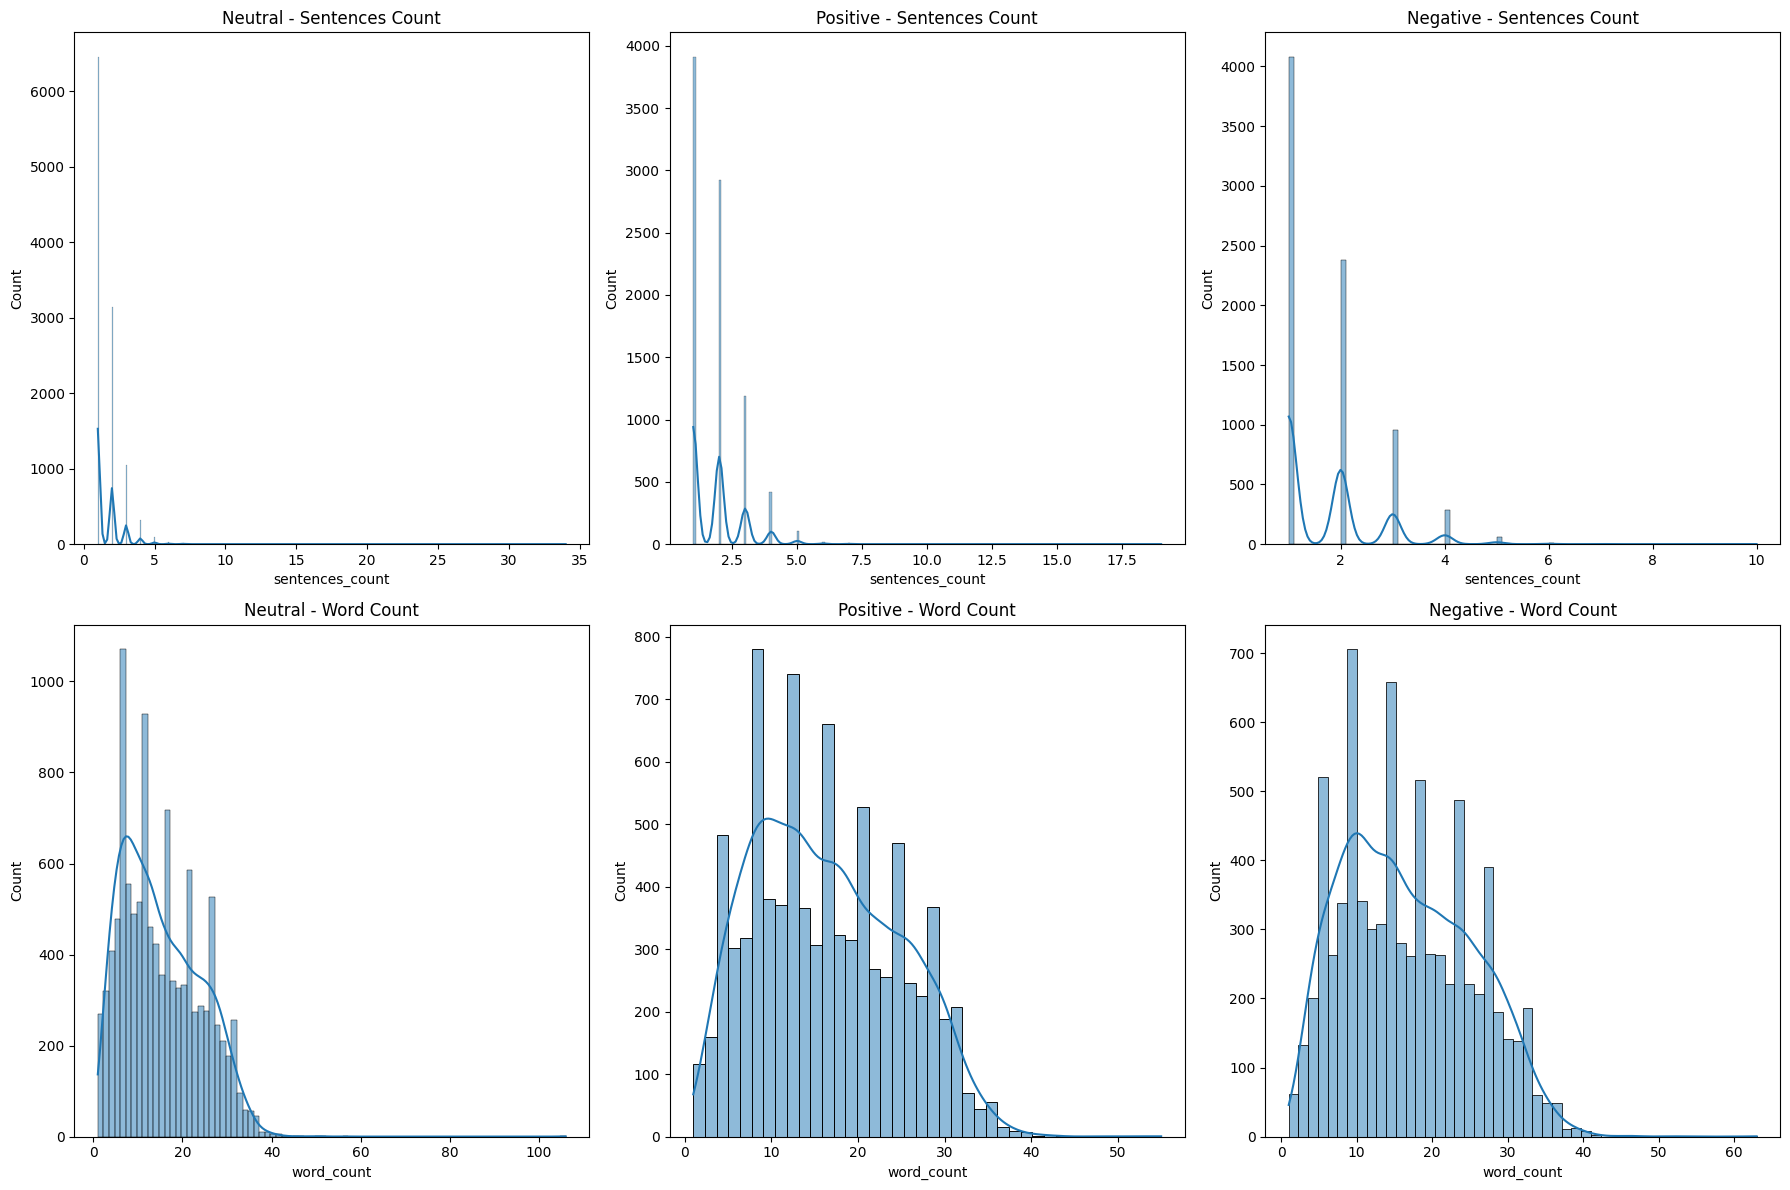

In [20]:
fig, ax = plt.subplots(2, 3, figsize=(18, 12))

# Plot distribusi sentences_count
ax[0, 0].set_title('Neutral - Sentences Count')
sns.histplot(df_eda[df_eda['sentiment'] == 'neutral']['sentences_count'], kde=True, ax=ax[0, 0])

ax[0, 1].set_title('Positive - Sentences Count')
sns.histplot(df_eda[df_eda['sentiment'] == 'positive']['sentences_count'], kde=True, ax=ax[0, 1])

ax[0, 2].set_title('Negative - Sentences Count')
sns.histplot(df_eda[df_eda['sentiment'] == 'negative']['sentences_count'], kde=True, ax=ax[0, 2])

# Plot distribusi word_count
ax[1, 0].set_title('Neutral - Word Count')
sns.histplot(df_eda[df_eda['sentiment'] == 'neutral']['word_count'], kde=True, ax=ax[1, 0])

ax[1, 1].set_title('Positive - Word Count')
sns.histplot(df_eda[df_eda['sentiment'] == 'positive']['word_count'], kde=True, ax=ax[1, 1])

ax[1, 2].set_title('Negative - Word Count')
sns.histplot(df_eda[df_eda['sentiment'] == 'negative']['word_count'], kde=True, ax=ax[1, 2])

# Adjust layout
plt.tight_layout()
plt.show()

In [21]:
# Print Max dan Average kalimat dari setiap kelas tweet
tweet_type = ['neutral','positive','negative']
for i in tweet_type :
    print('Type' , i)
    print(f'Max sentence 0f {i} tweet ', df_eda[df_eda['sentiment'] == i]['sentences_count'].max())
    print(f'Mean sentence 0f {i} tweet ', df_eda[df_eda['sentiment'] == i]['sentences_count'].mean())
    print(f'Max word 0f {i} tweet ', df_eda[df_eda['sentiment'] == i]['word_count'].max())
    print(f'Mean word 0f {i} tweet ', df_eda[df_eda['sentiment'] == i]['word_count'].mean())
    print('')

Type neutral
Max sentence 0f neutral tweet  34
Mean sentence 0f neutral tweet  1.6233696141045246
Max word 0f neutral tweet  106
Mean word 0f neutral tweet  15.148061527390484

Type positive
Max sentence 0f positive tweet  19
Mean sentence 0f positive tweet  1.8354695875087392
Max word 0f positive tweet  55
Mean word 0f positive tweet  16.26951759496621

Type negative
Max sentence 0f negative tweet  10
Mean sentence 0f negative tweet  1.7065929829070814
Max word 0f negative tweet  63
Mean word 0f negative tweet  16.756586556997814



It appears that neutral tweets tend to have a lower average number of sentences but a higher maximum number of sentences compared to negative and positive tweets. This indicates that while some neutral tweets are very concise, others can be quite detailed. Additionally, neutral tweets have a slightly lower average word count compared to negative tweets but higher compared to positive tweet.

This observation suggests that neutral tweets may vary more in length and could be more information-dense, potentially presenting information in a concise manner or utilizing longer sentences to convey more detail.

## 3. Wordcloud

Display the most frequently occurring words in tweets using a word cloud. This will provide a visual representation of the most frequently occurring words in tweets. 

Here is the word cloud displaying the most common words found in the tweets.

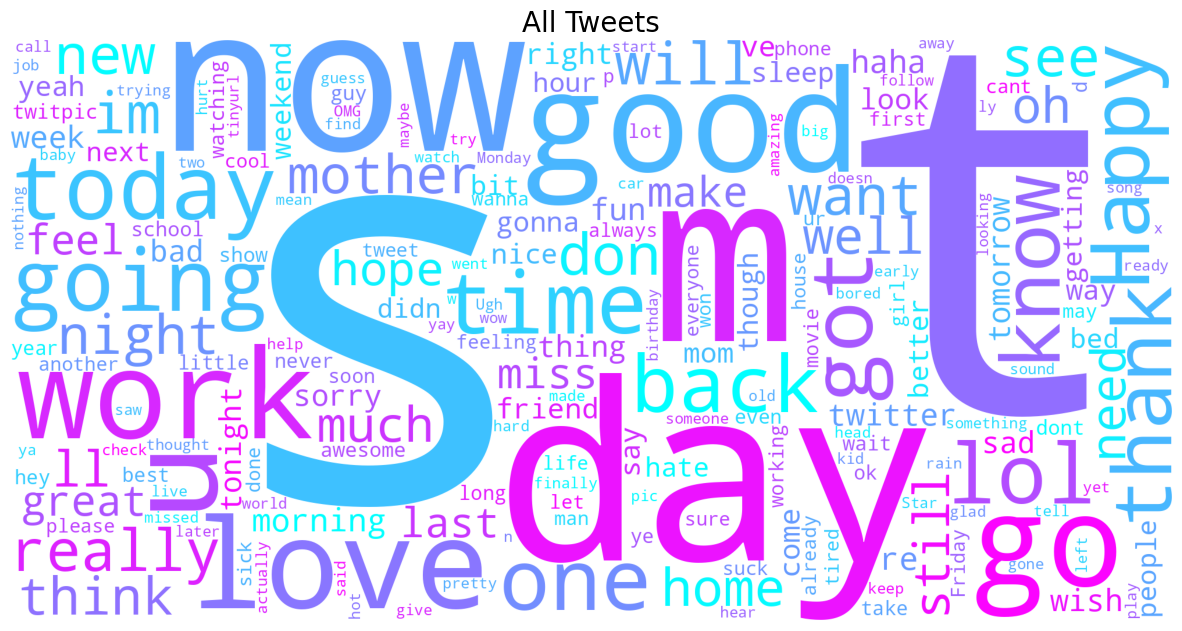

[('to', 9809), ('I', 8802), ('the', 8388), ('a', 6501), ('my', 4932), ('and', 4677), ('i', 4263), ('you', 3808), ('is', 3670), ('for', 3575)]


In [22]:
# Join all texts into a single string
text_all = " ".join(df_eda['text'].values)

# Create WordCloud
cloud_all = WordCloud(
    background_color='white',
    colormap="cool",
    collocations=False,
    width=2000,
    height=1000
).generate(text_all)

# Display WordCloud
plt.figure(figsize=(15,10))
plt.axis('off')
plt.title("All Tweets", fontsize=20)
plt.imshow(cloud_all)
plt.show()

# Tokenization and Word Frequency Count
words = text_all.split()
word_freq = Counter(words)

# Display the 10 most common words
print(word_freq.most_common(10))

From the image, it can be seen that the most frequently appearing words are stopwords and words with less than 3 characters such as `s`, `t`, `m`, `go`, `don`, `ll`, `a`, `i`, `the`, `is`, and many more. This can be observed in the wordcloud image above.

Below, I'll also display other frequently occurring words, excluding stopwords. Let me show you the list of 100 other words.

In [23]:
# Membuat top 100 highest
df_eda['tweet_list'] = df_eda['text'].apply(lambda x:str(x).split())
high_all = Counter([item for sublist in df_eda['tweet_list'] for item in sublist])
tweet_high_all = pd.DataFrame(high_all.most_common(100))
tweet_high_all.columns = ['Words','Count']
tweet_high_all.style.background_gradient(cmap='Spectral_r')

,Words,Count
0,to,9809
1,I,8802
2,the,8388
3,a,6501
4,my,4932
5,and,4677
6,i,4263
7,you,3808
8,is,3670
9,for,3575


From the information above, it can be concluded that:
- Some words consist of only 1 letter and some contain numbers.
- There are both lowercase and uppercase words, but lowercase is dominant.
- Most of the words are only 4 characters or less.

I will create a list containing these words and add them to the stopwords list for the cleaning process later.

## 4. Viewing word clouds for each sentiment category

After examining the most common words in all texts, next I will look at the most common words in each sentiment category.

[('to', 4057), ('I', 3365), ('the', 3329), ('a', 2438), ('my', 1800)]


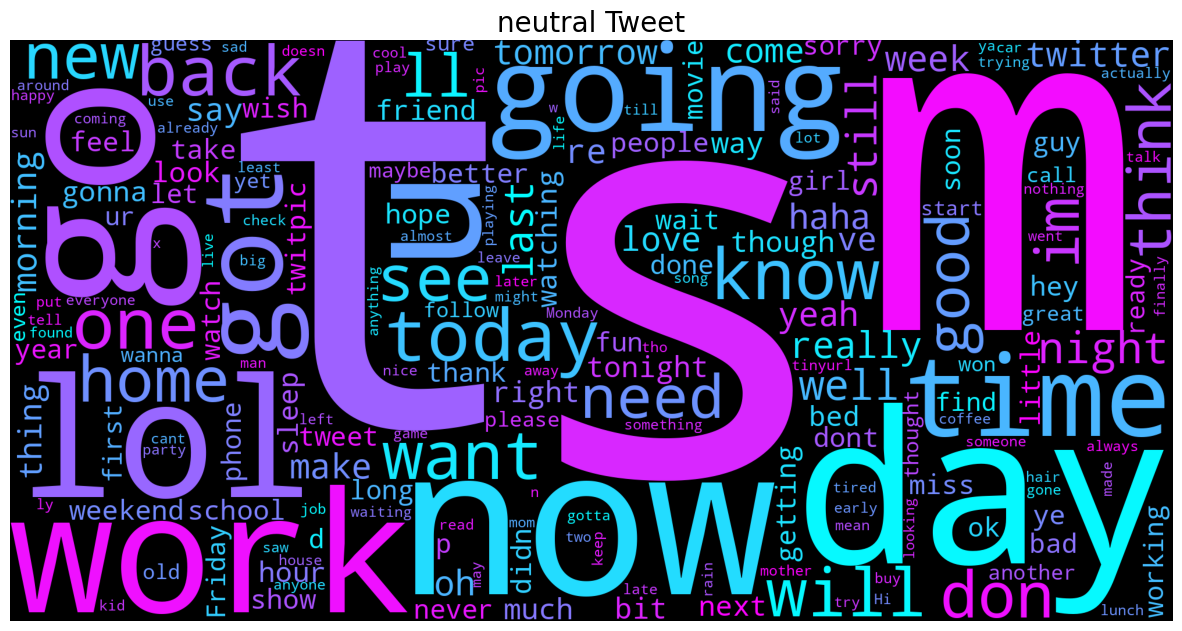

In [24]:
text_neutral = df_eda[df_eda['sentiment'] == 'neutral'].text.values

# Join all neutral texts into a single string
all_neutral_text = " ".join(text_neutral)

# Membuat wordcloud
cloud_neutral = WordCloud(background_color='black',colormap="cool",collocations=False,width=2000,height=1000).generate(" ".join(text_neutral))

# Menampilkan wordcloud
plt.figure(figsize=(15,10))
plt.axis('off')
plt.title("neutral Tweet",fontsize=20)
plt.imshow(cloud_neutral)

# Tokenization and Word Frequency Count
words_neutral = all_neutral_text.split()
word_freq_neutral = Counter(words_neutral)

# Display the 10 most common words
print(word_freq_neutral.most_common(5))

[('to', 2914), ('the', 2758), ('I', 2481), ('a', 2305), ('you', 1583)]


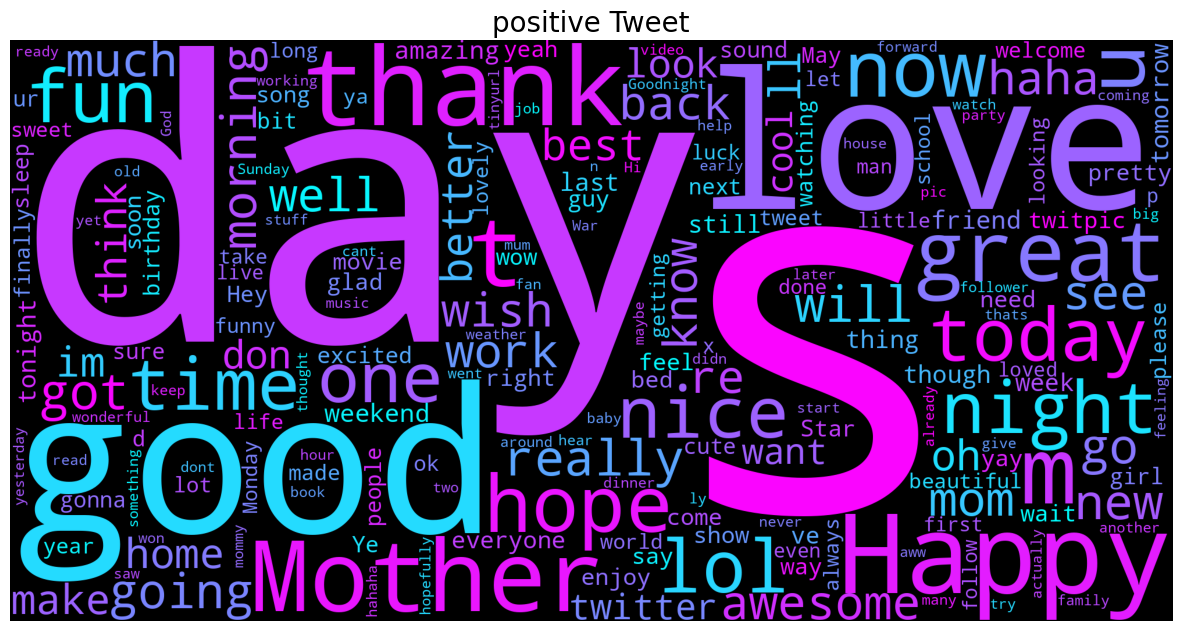

In [25]:
text_positive = df_eda[df_eda['sentiment'] == 'positive'].text.values

# Join all positive texts into a single string
all_positive_text = " ".join(text_positive)

# Membuat wordcloud
cloud_positive = WordCloud(background_color='black',colormap="cool",collocations=False,width=2000,height=1000).generate(" ".join(text_positive))

# Menampilkan wordcloud
plt.figure(figsize=(15,10))
plt.axis('off')
plt.title("positive Tweet",fontsize=20)
plt.imshow(cloud_positive)

# Tokenization and Word Frequency Count
words_positive = all_positive_text.split()
word_freq_positive = Counter(words_positive)

# Display the 10 most common words
print(word_freq_positive.most_common(5))

[('I', 2956), ('to', 2838), ('the', 2301), ('my', 1778), ('a', 1758)]


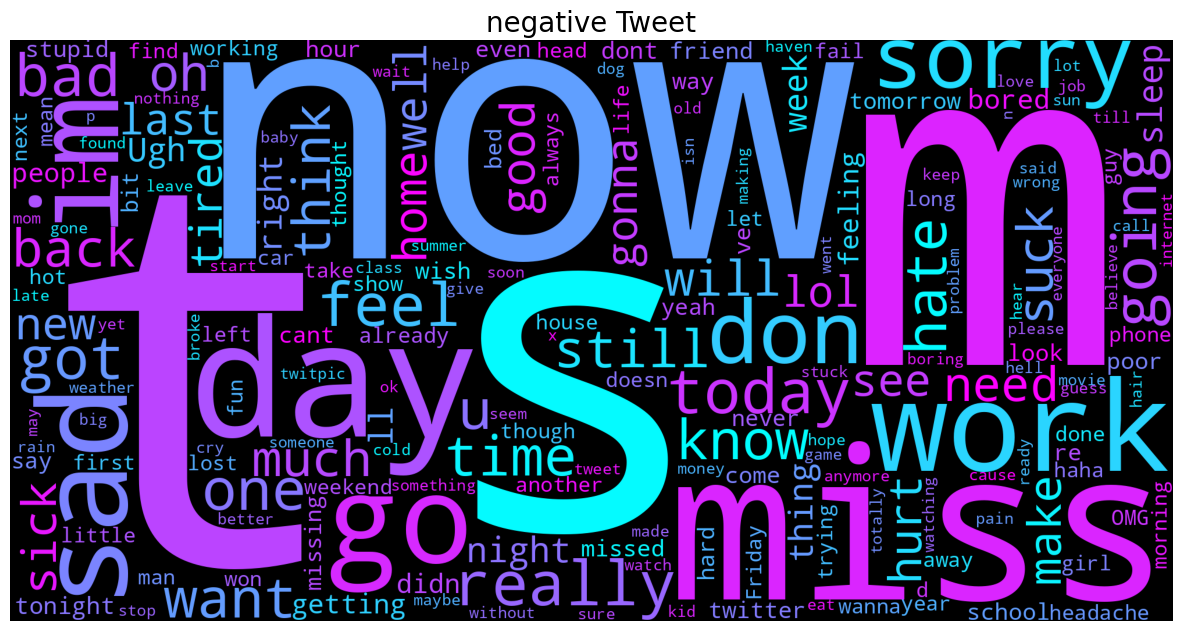

In [26]:
text_negative = df_eda[df_eda['sentiment'] == 'negative'].text.values

# Join all negative texts into a single string
all_negative_text = " ".join(text_negative)

# Membuat wordcloud
cloud_negative = WordCloud(background_color='black',colormap="cool",collocations=False,width=2000,height=1000).generate(" ".join(text_negative))

# Menampilkan wordcloud
plt.figure(figsize=(15,10))
plt.axis('off')
plt.title("negative Tweet",fontsize=20)
plt.imshow(cloud_negative)

# Tokenization and Word Frequency Count
words_negative = all_negative_text.split()
word_freq_negative = Counter(words_negative)

# Display the 10 most common words
print(word_freq_negative.most_common(5))

It seems that all three categories have common top words appearing frequently, such as `to`, `I`, `the`, `a`, `my`, and `you`.

# v. Text Processing

After doing EDA, I know what needs to be cleaned from the data. So the next step I will preprocess the data for preparing text data for analysis, modeling, and extracting meaningful insights. It helps to remove noise, standardize the data, and focus on the relevant content, leading to better results and more accurate interpretations.

In [27]:
# Show the stopwords downloaded
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# Additional Stopwords
additional_stopwords =['to', 'I','the','a','my','and','i', 'you', 'is', 'for', 'in', 'of',
 'it', 'on', 'have', 'that', 'me', 'so', 'with', 'be', 'but',
 'at', 'was', 'just', 'I`m', 'not', 'get', 'all', 'this', 'are',
 'out', 'like', 'day', '-', 'up', 'go', 'your', 'good', 'got', 'from',
 'do', 'going', 'no', 'now', 'love', 'work', '****', 'will', 'about',
 'one', 'really', 'it`s', 'u', 'don`t', 'some', 'know', 'see', 'can',
 'too', 'had', 'am', 'back', '&', 'time', 'what', 'its', 'want', 'we',
 'new', 'as', 'im', 'think', 'can`t', '2', 'if', 'when', 'an', 'more',
 'still', 'today', 'miss', 'has', 'they', 'much', 'there', 'last',
 'need', 'My', 'how', 'been', 'home', 'lol', 'off', 'Just', 'feel',
 'night', 'i`m', 'her', 'would', 'The'
 ]

In [29]:
# Setting stopwords english
stpwds_eng = list(set(stopwords.words('english')))
for i in additional_stopwords:
    stpwds_eng.append(i)

Next is to define the cleaning function

In [30]:
%%time
# Creating a cleaning function

cleaning_pattern = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+" # Pattern source https://www.kaggle.com/paoloripamonti/twitter-sentiment-analysis
lemmatizer = WordNetLemmatizer()


def text_process(text):

    # Convert text to lowercase
    text = text.lower()

    # Remove mentions, links, and non-alphanumeric characters
    text = re.sub(cleaning_pattern, ' ', text)

    # Remove Mention
    text = re.sub("@[A-Za-z0-9_]+", " ", text)

    # Remove Hashtag
    text = re.sub("#[A-Za-z0-9_]+", " ", text)

    # Remove \n (newline)
    text = re.sub(r"\\n", " ",text)

    # Remove words below 3 characters
    text = re.sub(r'\b\w{1,3}\b', " ",text)

    # URL removal
    text = re.sub(r"http\S+", " ", text)
    text = re.sub(r"www.\S+", " ", text)

    # Remove Whitespace at the beginning and end
    text = text.strip()

    # Non-letter removal (such as emoticon, symbol (like μ, $, 兀), etc)
    text = re.sub("[^A-Za-z\s']", " ", text)

    # Remove double space
    text = re.sub("\s\s+" , " ", text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove Stopwords
    text = ' '.join([word for word in tokens if word not in stpwds_eng])

    # Lemmatization
    text = lemmatizer.lemmatize(text)

    return text

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 11.4 µs


In [31]:
%%time
# Applying to text
df_final = df.copy()
df_final['tweet_processed'] = df_final['text'].apply(text_proses)
# show top 10 data after cleaning 
df_final.tail(10)

CPU times: user 7.36 s, sys: 98.9 ms, total: 7.46 s
Wall time: 7.77 s


,text,sentiment,tweet_processed
27471,"i`m defying gravity. and nobody in alll of oz,...",neutral,defying gravity nobody alll wizard ever gon na...
27472,http://twitpic.com/663vr - Wanted to visit the...,negative,wanted visit animals late
27473,in spoke to you yesterday and u didnt respond...,neutral,spoke yesterday didnt respond girl wassup though
27474,So I get up early and I feel good about the da...,positive,early walk feeling alright guess
27475,enjoy ur night,positive,enjoy
27476,wish we could come see u on Denver husband l...,negative,wish could come denver husband lost afford
27477,I`ve wondered about rake to. The client has ...,negative,wondered rake client made clear force devs lea...
27478,Yay good for both of you. Enjoy the break - y...,positive,enjoy break probably hectic weekend take care ...
27479,But it was worth it ****.,positive,worth
27480,All this flirting going on - The ATG smiles...,neutral,flirting smiles hugs


# vi. Text after process

after the data is processed, then I will display the processed data.

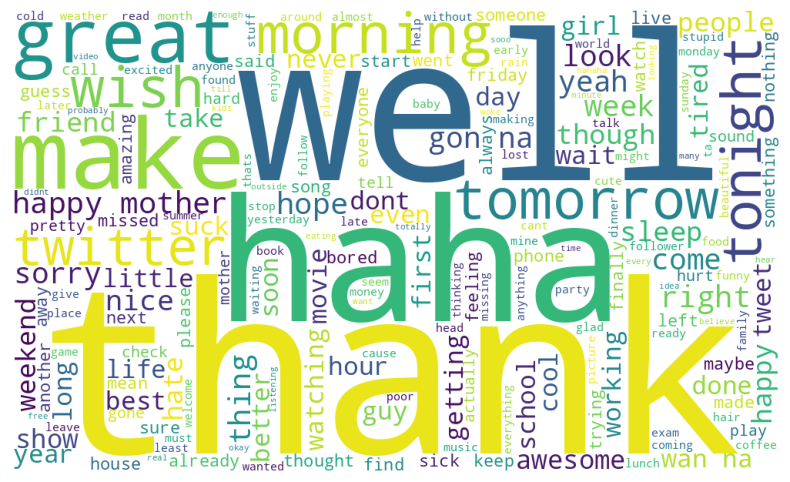

[('happy', 996), ('well', 716), ('na', 692), ('thanks', 674), ('great', 621), ('hope', 611), ('morning', 579), ('haha', 568), ('twitter', 530), ('tomorrow', 517)]


In [32]:
all_words_after = ' '.join(word for word in df_final['tweet_processed'])

wordcloud = WordCloud(
    width = 1000,
    height = 600,
    background_color = 'white').generate(all_words_after)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Tokenisasi kata-kata dalam string besar
words_after = all_words_after.split()
word_freq_after = Counter(words_after)

# Menampilkan 10 kata paling umum
print(word_freq_after.most_common(10))

# vii. Feature Enginering

## Target Encoding

Next I will encode the target 

In [33]:
# View Target
df_final['sentiment'].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

in the target there are 3 unique values, then I will encode using labelencoder.

In [34]:
# Convert Target from String into Numeric
label_encoder = LabelEncoder()
df_final['label'] = label_encoder.fit_transform(df_final['sentiment'])
df_final.head()

,text,sentiment,tweet_processed,label
0,"I`d have responded, if I were going",neutral,responded,1
1,Sooo SAD I will miss you here in San Diego!!!,negative,sooo diego,0
2,my boss is bullying me...,negative,boss bullying,0
3,what interview! leave me alone,negative,interview leave alone,0
4,"Sons of ****, why couldn`t they put them on t...",negative,sons releases already bought,0


In [35]:
# Get Label Name
le_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(le_name_mapping)

{'negative': 0, 'neutral': 1, 'positive': 2}


In [36]:
# Target Distribution
df_final['label'].value_counts()

label
1    11117
2     8582
0     7781
Name: count, dtype: int64

## Data Splitting

After the label has been encoded with the label encoder, I will split the feature with the target.

In [37]:
# Splitting between `X` and `y`

X = df_final['tweet_processed']
y = df_final['label']

The dataset is separated into a train and validation dataset for model training, and a test dataset for model testing. Separation is done with a ratio of 85% train-validation and 15% test.

In [38]:
# Splitting between Train-Set, Val-Set, and Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=10,stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=10,stratify=y_train_val)

print('Train Size : ', X_train.shape)
print('Val Size   : ', X_val.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (19854,)
Val Size   :  (3504,)
Test Size  :  (4122,)


## Target Encode

Then I encode the target with a onehot encoder because the target has a sequence.

In [39]:
# Change Target to One Hot Encoding
y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)
y_test_ohe = to_categorical(y_test)
y_train_ohe

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

After that I will do text vectorization

## Text Vectorization

Text vectorization is a crucial step in the preprocessing pipeline for natural language processing (NLP) tasks. It converts raw text data into numerical representations that can be processed by machine learning algorithms.

In [40]:
# Get Vocabularies
Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_test_vec = Vectorize.transform(X_test)

X_train_vec

<19854x17732 sparse matrix of type '<class 'numpy.int64'>'
	with 96910 stored elements in Compressed Sparse Row format>

In [41]:
# Finding the Number of Vocabs and Max Token Length in One Document

total_vocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print('Total Vocab : ', total_vocab)
print('Maximum Sentence Length : ', max_sen_len, 'tokens')

Total Vocab :  17732
Maximum Sentence Length :  17 tokens


In [42]:
# Text Vectorization

text_vectorization = TextVectorization(max_tokens=total_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,)
                                       )

text_vectorization.adapt(X_train)

In [43]:
# Result

## Document
print('Document example')
print(df_final.tweet_processed[0])
print('')

## Result of Text Vectorization
print('Result of Text Vectorization')
print(text_vectorization([df_final.tweet_processed[0]]))
print('Vector size : ', text_vectorization([df_final.tweet_processed[0]]).shape)

Document example
responded

Result of Text Vectorization
tf.Tensor(
[[10023     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]], shape=(1, 17), dtype=int64)
Vector size :  (1, 17)


In [44]:
# View the Top 20 Tokens (Sorted by the Highest Frequency of Appearance)

text_vectorization.get_vocabulary()[:20]

['',
 '[UNK]',
 'happy',
 'well',
 'na',
 'thanks',
 'great',
 'hope',
 'haha',
 'morning',
 'twitter',
 'wish',
 'tomorrow',
 'sorry',
 'tonight',
 'right',
 'gon',
 'yeah',
 'though',
 'mother']

After that I will do word embeding

## Embeding

Word embeddings are dense vector representations of words that capture semantic meaning.

In [45]:
# Embedding
%%time

embedding = Embedding(input_dim=total_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len) 

CPU times: user 2.29 ms, sys: 16 µs, total: 2.31 ms
Wall time: 2.32 ms


In [46]:
# Example Result

## Document example
print('Document example')
print(df_final.tweet_processed[0])
print('')

## Result of Text Vectorization
print('Result of  Text Vectorization')
print(text_vectorization([df_final.tweet_processed[0]]))
print('Vector size : ', text_vectorization([df_final.tweet_processed[0]]).shape)
print('')

## Result of  Embedding
print('Result of  Embedding')
print(embedding(text_vectorization([df_final.tweet_processed[0]])))
print('Vector size : ', embedding(text_vectorization([df_final.tweet_processed[0]])).shape)

Document example
responded

Result of  Text Vectorization
tf.Tensor(
[[10023     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]], shape=(1, 17), dtype=int64)
Vector size :  (1, 17)

Result of  Embedding
tf.Tensor(
[[[ 0.0410352  -0.01686933  0.04519813 ...  0.02986927 -0.02034207
    0.01574117]
  [-0.03532307  0.01872135 -0.02981114 ...  0.01981235 -0.04469118
   -0.00925117]
  [-0.03532307  0.01872135 -0.02981114 ...  0.01981235 -0.04469118
   -0.00925117]
  ...
  [-0.03532307  0.01872135 -0.02981114 ...  0.01981235 -0.04469118
   -0.00925117]
  [-0.03532307  0.01872135 -0.02981114 ...  0.01981235 -0.04469118
   -0.00925117]
  [-0.03532307  0.01872135 -0.02981114 ...  0.01981235 -0.04469118
   -0.00925117]]], shape=(1, 17, 128), dtype=float32)
Vector size :  (1, 17, 128)


# viii. Model Definition

After completing the data preprocessing, then I will start modeling. Starting with creating a model definition.

In [47]:
# Model Training using LSTM
%%time

## Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)
'''
- This block of code ensures that any previous models and layers are cleared from memory.
- Setting a random seed ensures reproducibility, meaning that every time you run the code, you get the same results.
'''
## Define the architecture
model_lstm_1 = Sequential()

# Layer Text Vectorization
model_lstm_1.add(text_vectorization)

# Layer Embedding
model_lstm_1.add(embedding)

# Hidden Layer 1
model_lstm_1.add(LSTM(64, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed)))
model_lstm_1.add(Dropout(0.2))

# Hidden Layer 2
model_lstm_1.add(LSTM(32, kernel_initializer=tf.keras.initializers.GlorotUniform(seed)))
model_lstm_1.add(Dropout(0.2))

model_lstm_1.add(Dense(3, activation='softmax'))

model_lstm_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

model_lstm_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 17)                0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 17, 128)           2269696   
                                                                 
 lstm (LSTM)                 (None, 17, 64)            49408     
                                                                 
 dropout (Dropout)           (None, 17, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                        

**Reasoning**

- use 2 hidden layer to increase the complexity of the model and enable it to learn more complex patterns in the data.  
- Adam Optimizer: Efficient and effective optimizer for training deep learning models.
- Categorical Cross-Entropy: Standard loss function for multi-class classification.
- Accuracy is chosen as the evaluation metric because it provides a clear indication of the model's performance in predicting the correct classes.
- Using LSTM Layers: LSTMs are well-suited for sequential data like text because they can capture temporal dependencies and long-range patterns.
- Sequential is used to build the model sequentially, from input to output, suitable for simple model architectures like the one used in this example.
- Dropout: Regularization technique to prevent overfitting.
- The numbers 64 and 32 are chosen as the number of units in the LSTM layers based on considerations of model complexity and dataset size, and can be empirically adjusted to achieve a balance between performance and computational speed.
- Dense layer is used as the output layer to generate class predictions based on the features learned by the model.
- Softmax Activation: Suitable for multi-class classification problems.

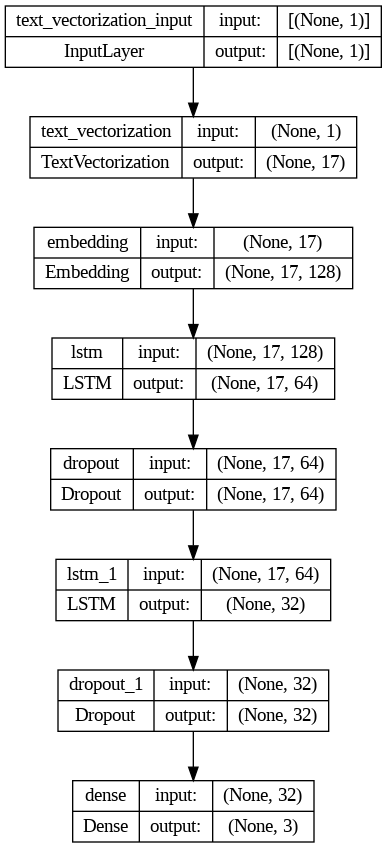

In [48]:
# Plot Layers
tf.keras.utils.plot_model(model_lstm_1, show_shapes=True)

# ix. Model Training

After doing model definition, I will do model training.

In [49]:
# Define EarlyStopping callback
'''
Callback early stopping monitors the performance of a model on 
a validation dataset during training and stops the training process when 
the model's performance on the validation set starts to deteriorate.
'''
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# Train the model
model_lstm_1_hist = model_lstm_1.fit(
    X_train, y_train_ohe,
    validation_data=(X_val, y_val_ohe),
    batch_size=32,
    epochs=50,
    callbacks=[early_stopping]
)

Epoch 1/50
621/621 [==============================] - 42s 60ms/step - loss: 0.9126 - accuracy: 0.5691 - val_loss: 0.8243 - val_accuracy: 0.6410
Epoch 2/50
621/621 [==============================] - 35s 56ms/step - loss: 0.6761 - accuracy: 0.7243 - val_loss: 0.8639 - val_accuracy: 0.6324
Epoch 3/50
621/621 [==============================] - 33s 54ms/step - loss: 0.4926 - accuracy: 0.8158 - val_loss: 1.0131 - val_accuracy: 0.6142
Epoch 4/50
621/621 [==============================] - 35s 56ms/step - loss: 0.3818 - accuracy: 0.8606 - val_loss: 1.2763 - val_accuracy: 0.6079
Epoch 5/50
621/621 [==============================] - 33s 53ms/step - loss: 0.3059 - accuracy: 0.8873 - val_loss: 1.2984 - val_accuracy: 0.6082
Epoch 6/50
621/621 [==============================] - 34s 54ms/step - loss: 0.2600 - accuracy: 0.9026 - val_loss: 1.6516 - val_accuracy: 0.6016
Epoch 6: early stopping


# x. Model Evaluation

After doing model training, I will do model evaluation.

In [50]:
# Create DataFrame
model_lstm_1_hist_df = pd.DataFrame(model_lstm_1_hist.history)
model_lstm_1_hist_df.tail()

,loss,accuracy,val_loss,val_accuracy
1,0.676086,0.724287,0.863859,0.632420
2,0.492613,0.815805,1.013085,0.614155
3,0.381845,0.860633,1.276299,0.607877
4,0.305889,0.887327,1.298447,0.608162
5,0.260033,0.902639,1.651598,0.601598


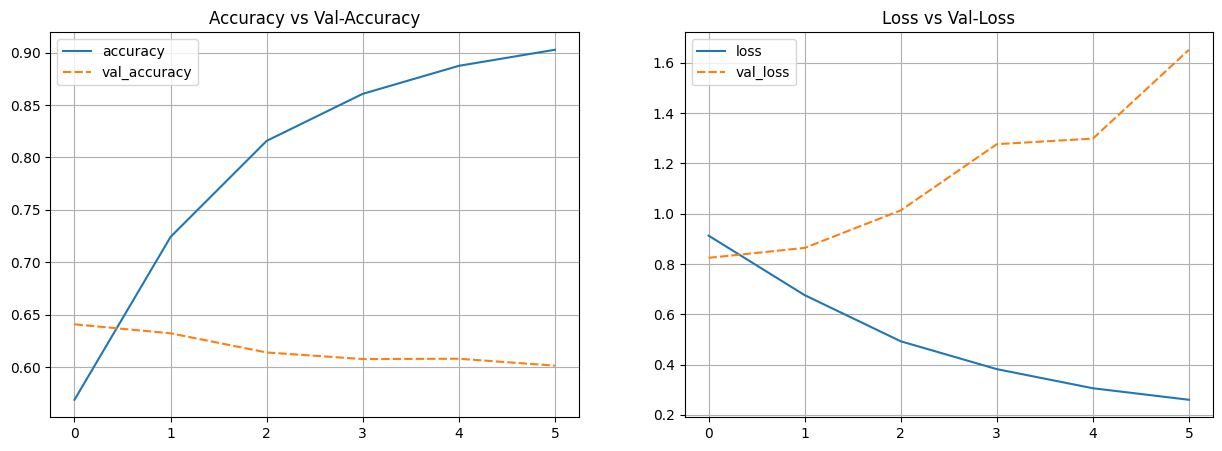

CPU times: user 834 ms, sys: 149 ms, total: 983 ms
Wall time: 55.2 s


In [51]:
%%time
# Plot Training Results
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_lstm_1_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_lstm_1_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

The graph above indicates that the training accuracy of the model increases to 90%, while the validation accuracy decreases from around 65% to 60%. Meanwhile, the training loss decreases from 1.0 to around 0.3, but the validation loss increases from around 0.8 to 1.6. This suggests that the model is experiencing overfitting, indicating the need for **model improvement**.

In [52]:
# Predict probabilities for each class
y_pred_seq_train_probs = model_lstm_1.predict(X_train)

# Get the predicted class labels (argmax along the last axis)
y_pred_seq_train = np.argmax(y_pred_seq_train_probs, axis=1)

# Classification report
print(classification_report(y_train, y_pred_seq_train))

621/621 [==============================] - 6s 8ms/step
              precision    recall  f1-score   support

           0       0.81      0.69      0.75      5622
           1       0.69      0.77      0.73      8031
           2       0.79      0.78      0.79      6201

    accuracy                           0.75     19854
   macro avg       0.76      0.75      0.75     19854
weighted avg       0.76      0.75      0.75     19854



129/129 [==============================] - 1s 7ms/step
              precision    recall  f1-score   support

           0       0.68      0.53      0.60      1167
           1       0.58      0.67      0.62      1668
           2       0.67      0.67      0.67      1287

    accuracy                           0.63      4122
   macro avg       0.64      0.62      0.63      4122
weighted avg       0.64      0.63      0.63      4122



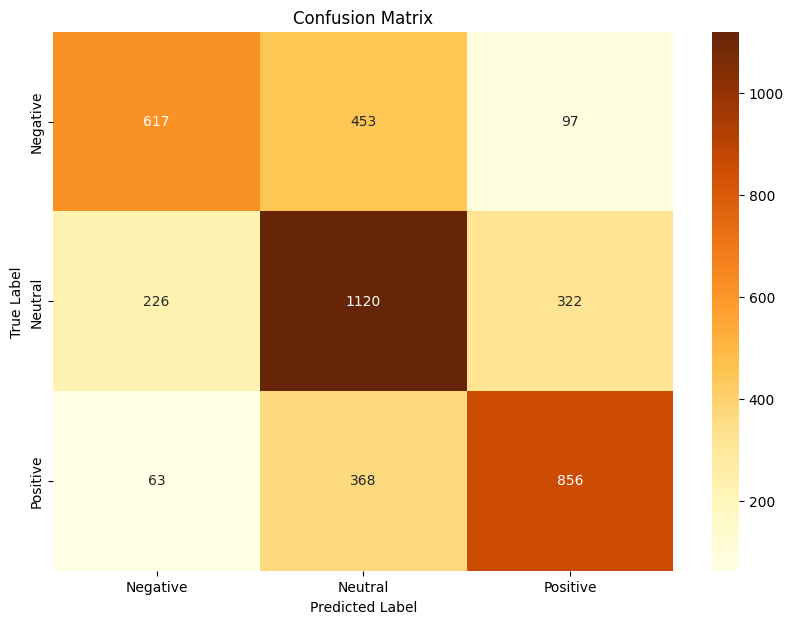

In [59]:
# Predict probabilities for each class
y_pred_seq_test_probs = model_lstm_1.predict(X_test)

# Get the predicted class labels (argmax along the last axis)
y_pred_seq_test = np.argmax(y_pred_seq_test_probs, axis=1)

# Classification report
print(classification_report(y_test, y_pred_seq_test))

# class_names is a list of our class names
class_names = ['Negative', 'Neutral', 'Positive']

# Generate confusion matrix
confusion = confusion_matrix(y_test, y_pred_seq_test)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(confusion, annot=True, fmt='d', cmap='YlOrBr', xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix shows that the model struggles with correctly classifying negative labels, with only 617 out of 1167 correct (53%). For neutral labels, the model is more accurate, with 1120 out of 1668 correct (67%), and for positive labels, 856 out of 1287 correct (67%). Overall, the model has an accuracy of 63%, with average precision and recall values around 64% and 62%, respectively, indicating a need for improvement in handling negative class predictions.

# xi. Model Improvement

Because the above model is still not performing well, I will conduct a model improvement with transfer learning.

## Transfer Learning

Using transfer learning with the pre-trained model 'tf2-preview-en-dim128-with-normalization' from for my dataset provides because:

1. **Pre-trained Knowledge**: The model has been trained on various English texts, so it has a deep understanding of language structure and context, which can improve performance on sentiment tasks.
   
2. **Time and Resource Efficiency**: Transfer learning reduces training time and the need for big data as the base model has already mastered many common language features, allowing focus on task-specific customization.
   
3. **Higher Accuracy**: Using pre-trained models often results in higher accuracy in sentiment classification as it utilizes a better representation of the text compared to models trained from scratch.

In [60]:
# Download the Embedding Layer

url = 'https://www.kaggle.com/models/google/nnlm/TensorFlow2/tf2-preview-en-dim128-with-normalization/1'

hub_layer = tf_hub.KerasLayer(url, output_shape=[128], input_shape=[], dtype=tf.string)

In [61]:
%%time
# Model Training using LSTM with Transfer Learning
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# Define the architecture
model_improve = Sequential()
model_improve.add(hub_layer)
model_improve.add(Reshape((128, 1)))
model_improve.add(Bidirectional(LSTM(64, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_improve.add(Dropout(0.5))
model_improve.add(Bidirectional(LSTM(32, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_improve.add(Dropout(0.5))
model_improve.add(Dense(3, activation='softmax'))

model_improve.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summary
model_improve.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 128)               124642688 
                                                                 
 reshape (Reshape)           (None, 128, 1)            0         
                                                                 
 bidirectional (Bidirection  (None, 128, 128)          33792     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 128, 128)          0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

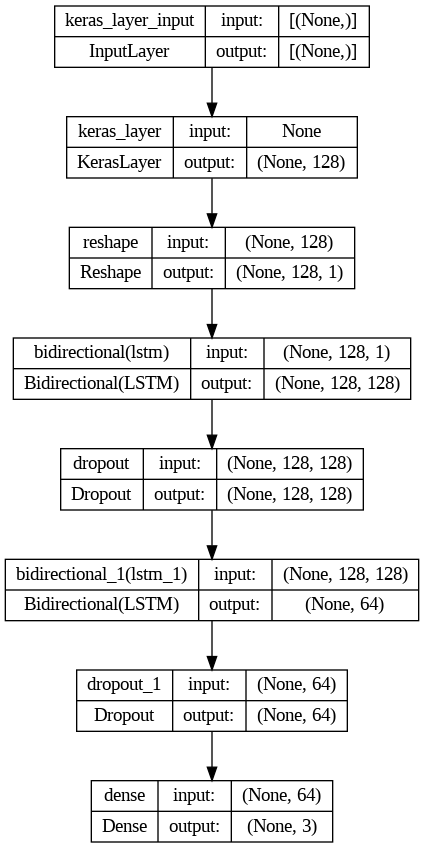

In [62]:
# Plot Layers
tf.keras.utils.plot_model(model_improve, show_shapes=True)

In [63]:
%%time
# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Train the model
model_improve_hist = model_improve.fit(
    X_train, y_train_ohe,
    validation_data=(X_val, y_val_ohe),
    batch_size=64,
    epochs=50,
    callbacks=[early_stopping]
)

Epoch 1/50
311/311 [==============================] - 99s 291ms/step - loss: 1.0848 - accuracy: 0.4090 - val_loss: 1.0774 - val_accuracy: 0.4209
Epoch 2/50
311/311 [==============================] - 88s 284ms/step - loss: 1.0728 - accuracy: 0.4288 - val_loss: 1.0646 - val_accuracy: 0.4461
Epoch 3/50
311/311 [==============================] - 90s 289ms/step - loss: 1.0700 - accuracy: 0.4297 - val_loss: 1.0448 - val_accuracy: 0.4612
Epoch 4/50
311/311 [==============================] - 87s 279ms/step - loss: 1.0449 - accuracy: 0.4655 - val_loss: 1.0212 - val_accuracy: 0.4909
Epoch 5/50
311/311 [==============================] - 91s 294ms/step - loss: 1.0204 - accuracy: 0.4876 - val_loss: 1.0011 - val_accuracy: 0.4983
Epoch 6/50
311/311 [==============================] - 90s 289ms/step - loss: 1.0095 - accuracy: 0.4998 - val_loss: 0.9967 - val_accuracy: 0.5063
Epoch 7/50
311/311 [==============================] - 86s 278ms/step - loss: 1.0046 - accuracy: 0.4996 - val_loss: 0.9898 - val_ac

The model can actually be made better if the epoch is increased, but because of the long running and time constraints, it is not possible to re-train the model with a higher epoch. 

In [64]:
# Create DataFrame
model_improve_hist_df = pd.DataFrame(model_improve_hist.history)
model_improve_hist_df.tail()

,loss,accuracy,val_loss,val_accuracy
45,0.904255,0.578221,0.924810,0.564212
46,0.901705,0.575753,0.920164,0.568779
47,0.899561,0.574796,0.921567,0.575913
48,0.897639,0.577063,0.930663,0.565925
49,0.898099,0.578322,0.930126,0.572203


**Tabel Metrik Akhir:**
- **Epoch 31:** Loss training = 0.898099, Akurasi training = 0.578322, Loss validasi = 0.930126, Akurasi validasi = 0.572203

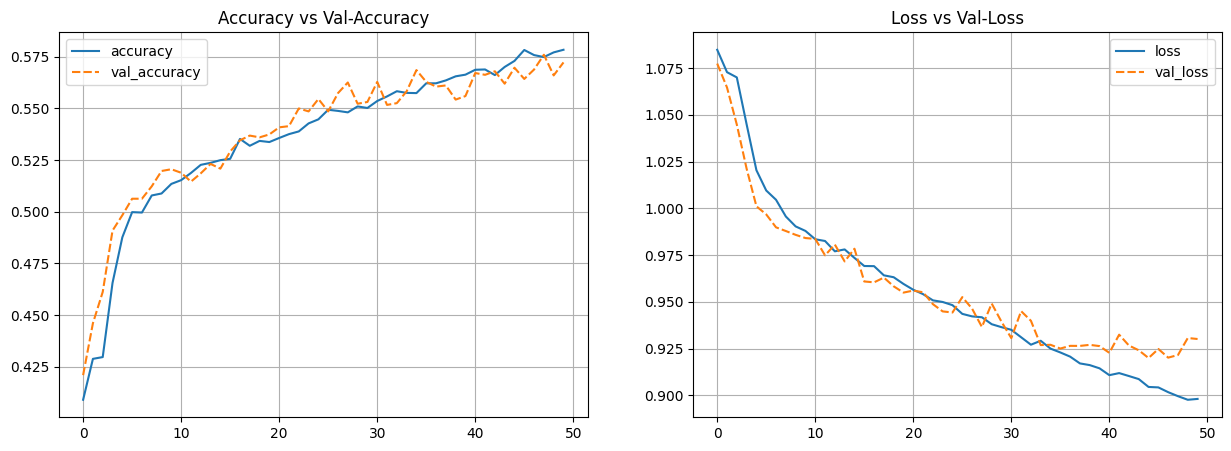

In [65]:
# Plot Training Results
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_improve_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_improve_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

the model demonstrates increasing accuracy over the epochs, reaching around 57.8% for training accuracy and 57.2% for validation accuracy, while both training and validation losses decrease steadily.

Given these results, the model is not significantly underfitting because it shows a consistent improvement in performance. However, the overall accuracy is relatively low, which suggests that while the model is learning, it may not be complex enough or may require further tuning to improve its predictive power. Here are a few points to consider:

1. **Low Accuracy**: The final accuracy values (around 57.8% for training and 57.2% for validation) indicate that the model is not capturing enough of the patterns in the data, but it is improving over time, which is a positive sign.

2. **Loss Reduction**: Both training and validation losses are decreasing, indicating that the model is learning and not merely memorizing the training data, which suggests it is not overfitting.

3. **Potential Improvement**: To enhance performance, you might consider increasing the model complexity, adding more features, or extending the training duration while being cautious of potential overfitting.

Overall, the model does not strictly fall into the underfitting category but may need further refinement to improve its effectiveness.

In [66]:
# Predict probabilities for each class
y_pred_seq_train_probs = model_improve.predict(X_train)

# Get the predicted class labels (argmax along the last axis)
y_pred_seq_train = np.argmax(y_pred_seq_train_probs, axis=1)

# Classification report
print(classification_report(y_train, y_pred_seq_train))

621/621 [==============================] - 34s 52ms/step
              precision    recall  f1-score   support

           0       0.62      0.54      0.58      5622
           1       0.55      0.63      0.59      8031
           2       0.64      0.59      0.61      6201

    accuracy                           0.59     19854
   macro avg       0.60      0.59      0.59     19854
weighted avg       0.60      0.59      0.59     19854



129/129 [==============================] - 6s 48ms/step
              precision    recall  f1-score   support

           0       0.55      0.49      0.51      1167
           1       0.54      0.61      0.57      1668
           2       0.58      0.54      0.56      1287

    accuracy                           0.55      4122
   macro avg       0.55      0.54      0.55      4122
weighted avg       0.55      0.55      0.55      4122



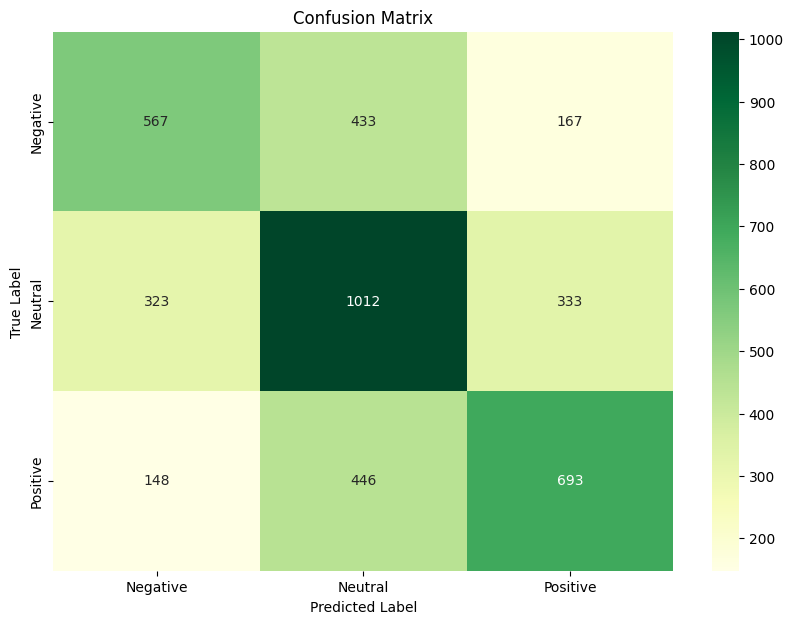

In [67]:
# Predict probabilities for each class
y_pred_seq_test_probs = model_improve.predict(X_test)

# Get the predicted class labels (argmax along the last axis)
y_pred_seq_test = np.argmax(y_pred_seq_test_probs, axis=1)

# Classification report
print(classification_report(y_test, y_pred_seq_test))

# class_names is a list of our class names
class_names = ['Negative', 'Neutral', 'Positive']

# Generate confusion matrix
confusion = confusion_matrix(y_test, y_pred_seq_test)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(confusion, annot=True, fmt='d', cmap='YlGn', xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Based on the evaluation results of the model using the confusion matrix and classification report, here the analysis:

1. **Classification Report (Training Set)**:
   - **Accuracy**: 59%
   - **Precision, Recall, and F1-score** vary between 0.55 and 0.64 for different classes, indicating the model has imbalances in predicting some classes better than others.

2. **Classification Report (Test Set)**:
   - **Accuracy**: 55%
   - **Precision, Recall, and F1-score** range between 0.51 and 0.57, indicating consistent but still low performance across all classes.

3. **Confusion Matrix**:
   - **Negative (0)**: 567 true negatives, 433 misclassified as neutral, 167 misclassified as positive.
   - **Neutral (1)**: 1012 true neutrals, 323 misclassified as negative, 333 misclassified as positive.
   - **Positive (2)**: 693 true positives, 446 misclassified as neutral, 148 misclassified as negative.

### Misclassification Analysis
- **Misclassification**: Occurs when the model incorrectly classifies an instance into the wrong class.
- **Negative -> Neutral**: 433 instances (the model misclassified negative data as neutral)
- **Neutral -> Negative**: 323 instances (the model misclassified neutral data as negative)
- **Positive -> Neutral**: 446 instances (the model misclassified positive data as neutral)

Overall, while the model has shown some improvements in accuracy and reduced loss, its performance still suggests that it has not adequately captured data patterns. The model may not strictly fall into the underfitting category but requires further refinement to enhance its effectiveness.

# xii. Model Saving

From the evaluation results, it turns out that the model improvement has better performance. Then the model improvemetn will be saved.

In [68]:
# frezze model
model_improve.trainable = False

# Model Summary
model_improve.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 128)               124642688 
                                                                 
 reshape (Reshape)           (None, 128, 1)            0         
                                                                 
 bidirectional (Bidirection  (None, 128, 128)          33792     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 128, 128)          0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [69]:
# Save the model
model_improve.save('model_improve')

# Directory name of model name
model_dir = 'model_improve'

# Save model as TensorFlow SavedModel
model_improve.save(model_dir, save_format='tf')

In [71]:
# Compress the folder
!zip -r model_improve.zip model_improve

# Download the compressed folder
files.download('model_improve.zip')

updating: model_improve/ (stored 0%)
updating: model_improve/assets/ (stored 0%)
updating: model_improve/assets/tokens.txt (deflated 43%)
updating: model_improve/keras_metadata.pb (deflated 92%)
updating: model_improve/variables/ (stored 0%)
updating: model_improve/variables/variables.data-00000-of-00001 (deflated 7%)
updating: model_improve/variables/variables.index (deflated 66%)
updating: model_improve/saved_model.pb (deflated 90%)
updating: model_improve/fingerprint.pb (stored 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#  xiii. Model Inference

Model inference is performed on a different notebook, the notebook name is `P2G7_vicky_eldora_inf`.

After model inference, it can be seen that the model can make predictions. In addition, the inference will also be deployed on the huggingface which can be seen here: __[Prediction-Sentiment-Tweets-Twitter](https://huggingface.co/spaces/vickyeldora/Predict-Twitter-Tweets-Sentiment?logs=build)__

# xiv. Overall Analysis



#### Model Improvement Suggestions

1. **Increase Model Complexity**:
   - **More Layers or Units**: Consider adding more LSTM layers or increasing the number of units in the existing LSTM layers.
   - **Hyperparameter Tuning**: Experiment with different dropout rates, learning rates, and batch sizes to find optimal settings.
   - **Additional Features**: Incorporate additional features like user metadata, text length, or sentiment scores from other tools.

2. **Extended Training**:
   - **More Epochs**: Training the model for more epochs could improve performance, provided overfitting is monitored and controlled.
   - **Early Stopping**: Implement early stopping with more patience to allow the model more time to learn.

3. **Data Augmentation and Preprocessing**:
   - **Data Augmentation**: Create synthetic data to balance classes or increase dataset size.
   - **Text Preprocessing**: Refine text preprocessing steps to include handling of slang, misspellings, or emoji.

#### Model Strengths and Weaknesses

**Strengths**:
- **Consistent Learning**: The model shows a steady increase in accuracy and a decrease in loss over the epochs, indicating it is learning from the data.
- **Transfer Learning Benefit**: Utilizing the pre-trained model provides a strong foundation and understanding of language context, which is beneficial for the sentiment analysis task.

**Weaknesses**:
- **Low Overall Accuracy**: With training and validation accuracies around 57-59%, the model's performance is relatively low.
- **Misclassification**: The confusion matrix indicates significant misclassification, especially in neutral sentiment predictions, which suggests the need for improved feature extraction or model adjustments.

#### Insights from the Analysis

1. **Frequent Words/Characters**:
   - **Neutral Tweets**: Common words like "lol," "thanx," and generic expressions of routine activities suggest a lack of strong sentiment, reflecting typical day-to-day interactions.
   - **Positive Tweets**: Words like "awesome," "thanks," "yummy," and expressions of excitement or happiness are prevalent, indicating positive experiences or feelings.
   - **Negative Tweets**: Words expressing dissatisfaction or negative emotions, such as "hate," "boo," "poor," and mentions of discomfort or negative experiences, highlight negative sentiment.

2. **Tweet Type Distribution**:
   - **Neutral**: 40.5% of the tweets are neutral, reflecting everyday interactions and statements that lack strong sentiment.
   - **Positive**: 31.2% of the tweets are positive, indicating expressions of happiness, appreciation, and positive experiences.
   - **Negative**: 28.3% of the tweets are negative, capturing complaints, negative experiences, and expressions of dissatisfaction.

   **Reasons**:
   - The higher proportion of neutral tweets is typical in social media data, where many interactions are routine or informational.
   - Positive tweets are relatively common, as people often share enjoyable experiences and gratitude.
   - Negative tweets are less frequent but still significant, as users express dissatisfaction or negative experiences.

### Conclusion
Model berbasis RNN yang dikembangkan untuk mengklasifikasikan tweet ke dalam kategori netral, positif, dan negatif secara efektif mengatasi masalah pengelolaan konten negatif di Twitter dengan mengidentifikasi postingan yang berbahaya secara akurat, sehingga berkontribusi pada lingkungan media sosial yang lebih sehat. Dievaluasi menggunakan metrik akurasi, model ini menunjukkan kinerja yang cukup baik, yang mengonfirmasi potensinya untuk diterapkan. Namun, perbaikan lebih lanjut diperlukan untuk meningkatkan akurasi dan mengurangi kesalahan klasifikasi. 